In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

In [36]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [37]:
data = pd.read_csv('netflix_titles.csv')

In [38]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [39]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]

In [40]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10)) #Setting the plot area for graph
    if h_lim :
        ax.set_ylim(0, h_lim) #Setting limits
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')  

    color =  ['green',  'blue',  'orange',  'red'] #setting colors for movie rating
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
    
#Using loop to distribute the rating
    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']): 
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)
#Setting title
ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))     
plt.savefig('Netflix_titles.png') #Saving image
plt.show() #Show image using a matplotlib function

NameError: name 'title' is not defined

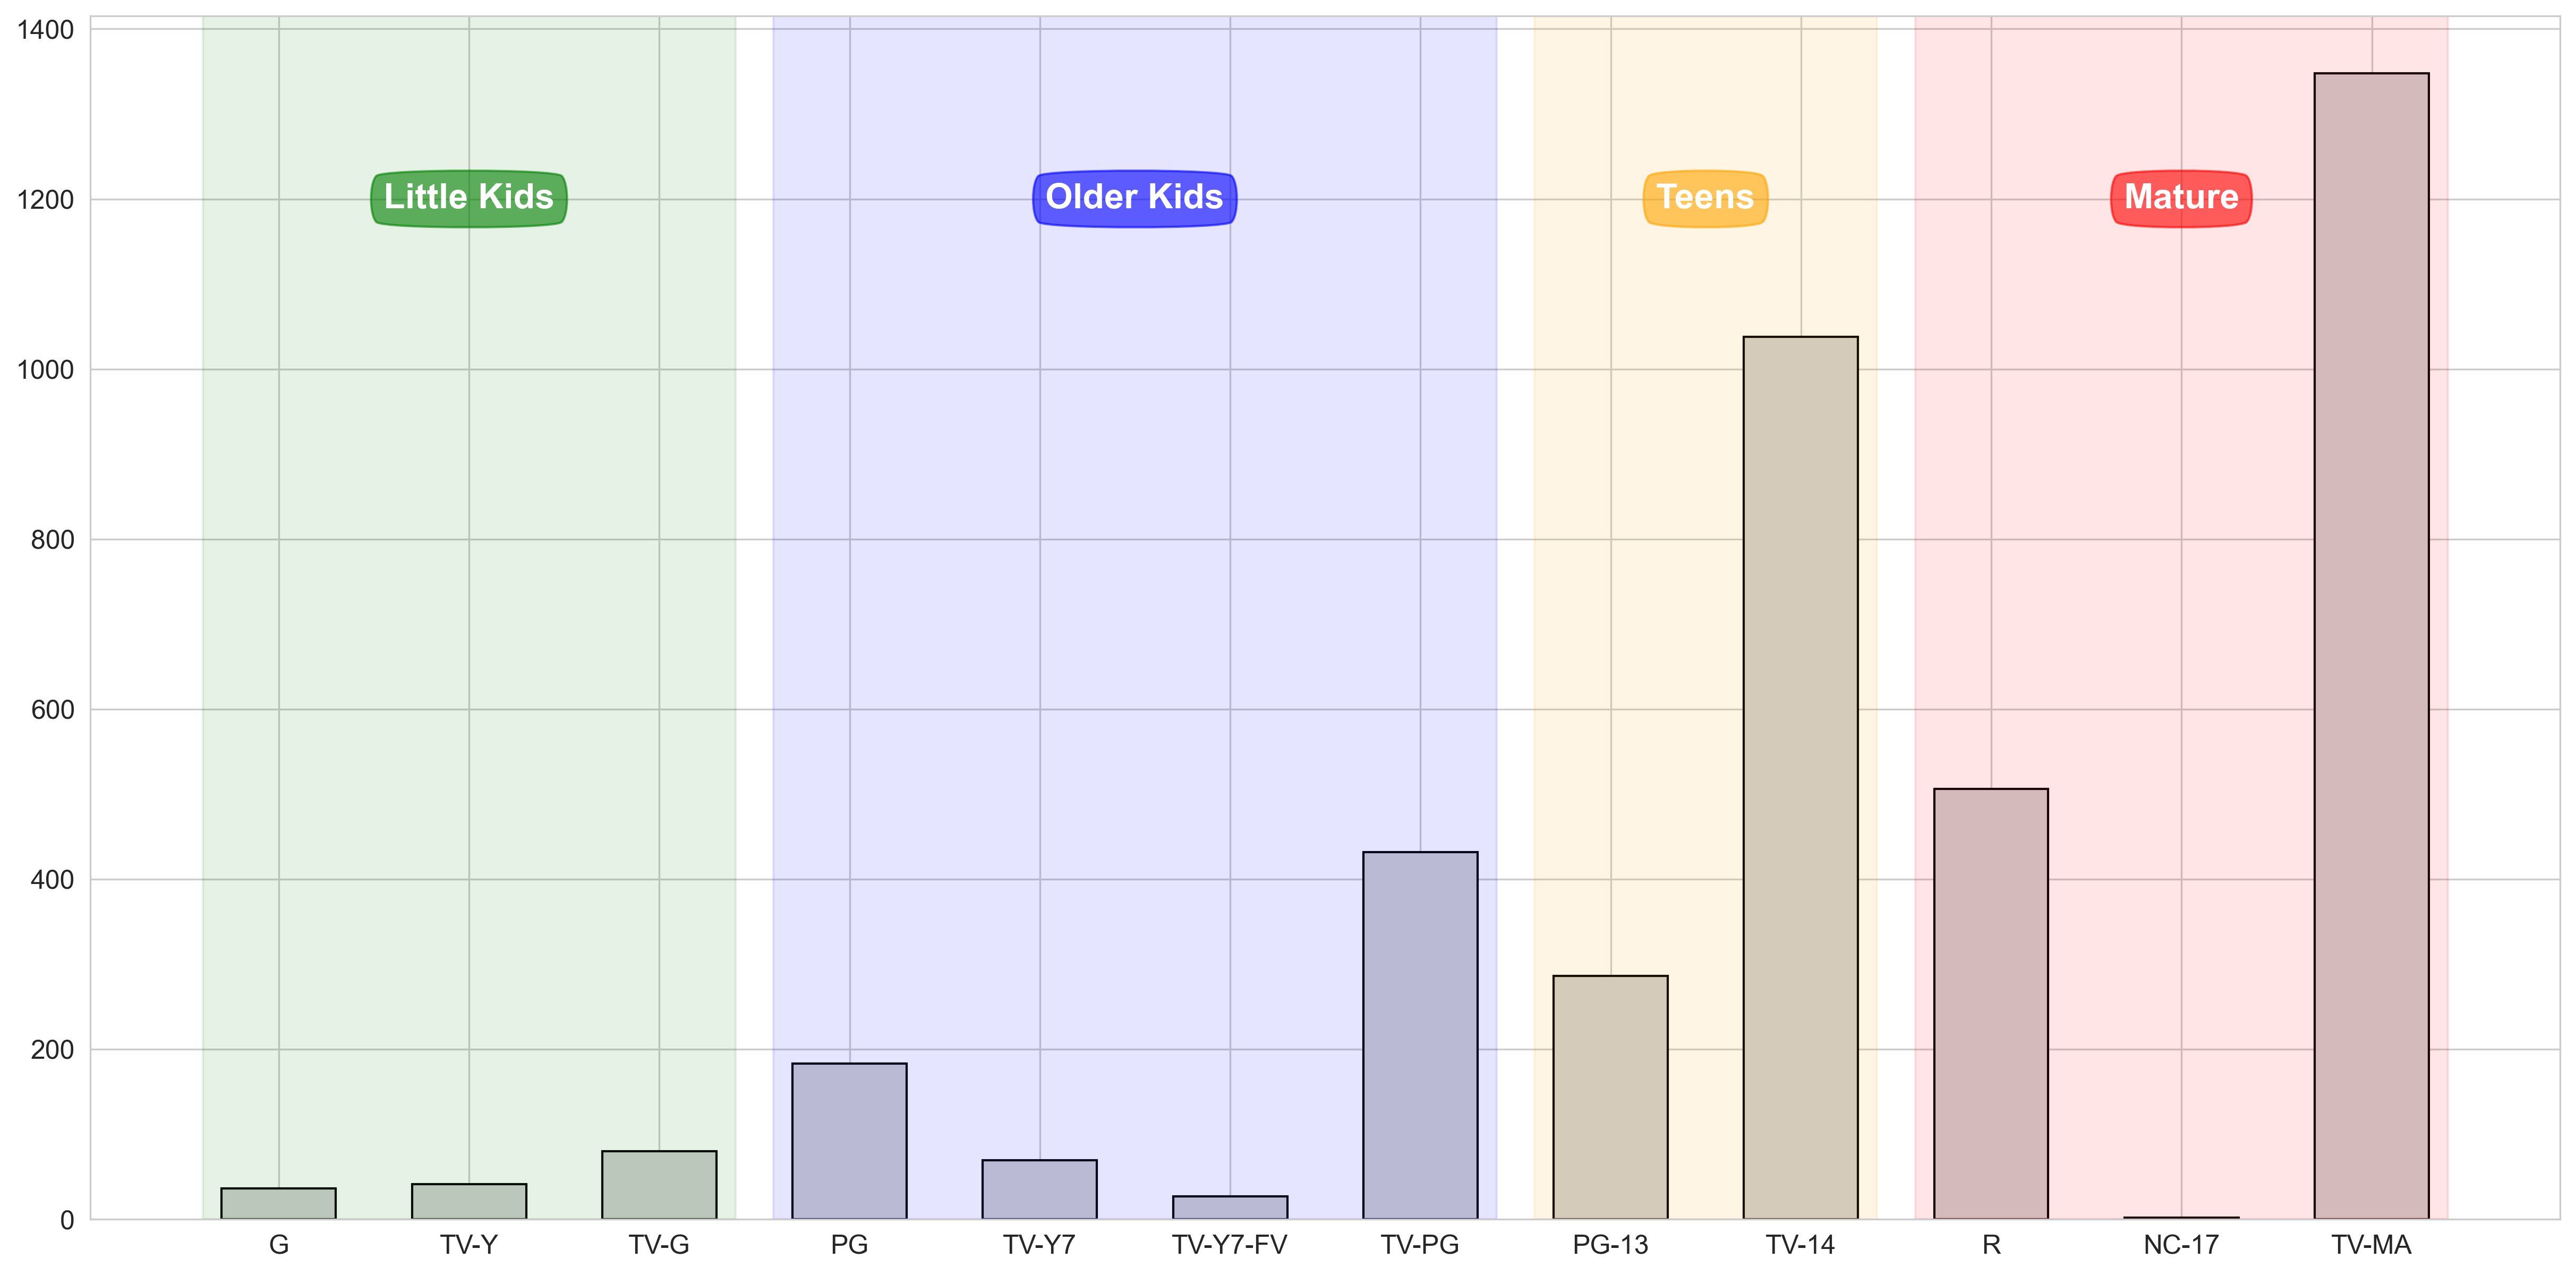

In [41]:
rating_barplot(movie_rating,'Movie', 1200)